# Limpieza de datos
### Santiago Chevez Trejo A01749887 
### Jocelyn Ileana Balderas Sánchez A01798528
### Emiliano Alberto Celis Montero A01799348 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bike_buyers.csv')
df.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12591,Married,Female,"30,000",4.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,45.0,No
1,14058,Single,Male,"70,000",0.0,Bachelors,Professional,No,1.0,5-10 Miles,Pacific,41.0,Yes
2,23962,Married,Female,"10,000",0.0,Partial High School,Manual,Yes,2.0,1-2 Miles,Europe,32.0,No
3,23419,Single,Female,"70,000",5.0,Bachelors,Professional,Yes,3.0,10+ Miles,Pacific,39.0,No
4,21940,Married,Male,"90,000",5.0,Graduate Degree,Professional,Yes,0.0,0-1 Miles,North America,47.0,Yes
5,23316,Single,Male,"30,000",3.0,Partial College,Clerical,No,2.0,1-2 Miles,Pacific,59.0,Yes
6,13351,Single,Female,"70,000",4.0,Bachelors,Management,Yes,2.0,1-2 Miles,North America,62.0,Yes
7,24107,Married,Male,"30,000",3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
8,18153,Married,Female,"100,000",2.0,Bachelors,Management,Yes,4.0,10+ Miles,Europe,59.0,No
9,21613,Single,Male,"50,000",2.0,Bachelors,Skilled Manual,No,1.0,0-1 Miles,North America,39.0,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1251 non-null   int64  
 1   Marital Status    1244 non-null   object 
 2   Gender            1238 non-null   object 
 3   Income            1243 non-null   object 
 4   Children          1238 non-null   float64
 5   Education         1251 non-null   object 
 6   Occupation        1251 non-null   object 
 7   Home Owner        1247 non-null   object 
 8   Cars              1242 non-null   float64
 9   Commute Distance  1251 non-null   object 
 10  Region            1251 non-null   object 
 11  Age               1238 non-null   float64
 12  Purchased Bike    1251 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 127.2+ KB


In [4]:
df.describe()

,ID,Children,Cars,Age
count,1251.000000,1238.000000,1242.000000,1238.000000
mean,20030.208633,1.929725,1.479066,44.058966
std,5331.451777,1.638977,1.121885,11.271138
min,11000.000000,0.000000,0.000000,25.000000
25%,15465.000000,0.000000,1.000000,35.000000
50%,19731.000000,2.000000,1.000000,43.000000
75%,24549.000000,3.000000,2.000000,52.000000
max,29447.000000,5.000000,4.000000,89.000000


In [12]:
df["Income"] = pd.to_numeric(df["Income"].str.replace(",", ""))

<Axes: ylabel='Frequency'>

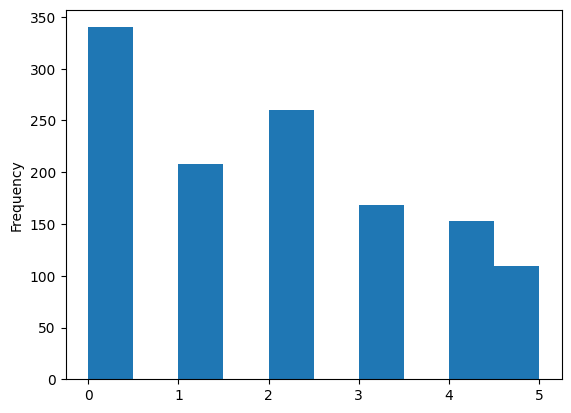

In [5]:
df["Children"].plot.hist()

<Axes: >

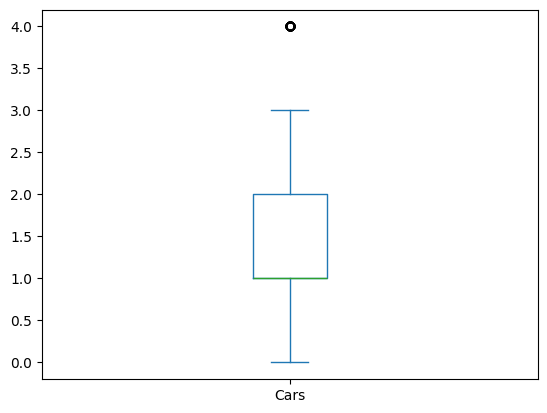

In [9]:
df["Cars"].plot.box()

<Axes: ylabel='Frequency'>

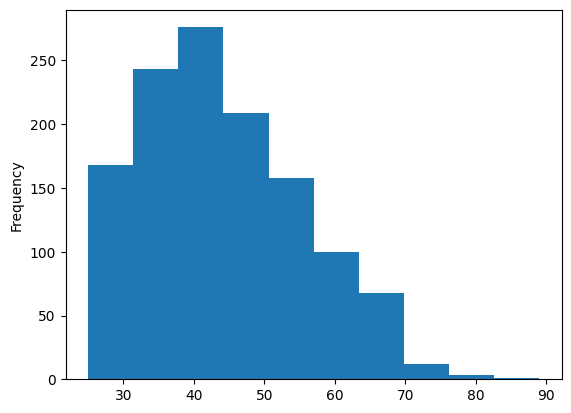

In [10]:
df["Age"].plot.hist()

<Axes: ylabel='Density'>

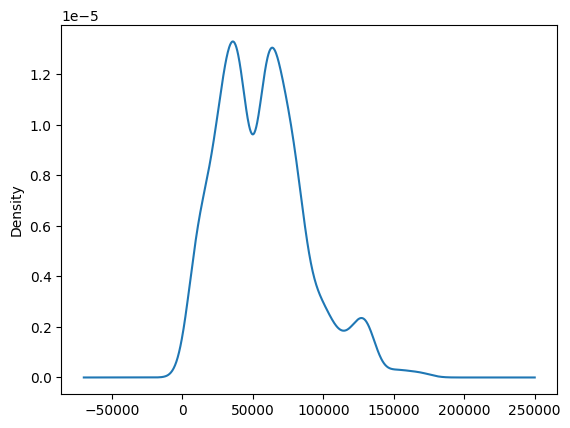

In [13]:
df["Income"].plot.kde()

In [14]:
columnas = ["Marital Status", "Gender", "Education", "Occupation", "Home Owner", "Commute Distance", "Region", "Purchased Bike"]
for col in columnas:
  df[col] = df[col].str.strip().str.replace("\n", " ").str.lower()

In [15]:
df[df.duplicated()]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
57,20598,married,male,100000.0,3.0,partial high school,professional,yes,0.0,10+ miles,europe,59.0,yes
98,19562,single,female,60000.0,2.0,bachelors,professional,yes,1.0,2-5 miles,pacific,37.0,yes
116,11270,married,male,130000.0,2.0,graduate degree,management,yes,3.0,0-1 miles,north america,42.0,yes
128,20380,married,female,60000.0,3.0,graduate degree,management,yes,2.0,10+ miles,north america,69.0,no
133,20897,married,female,30000.0,1.0,bachelors,skilled manual,yes,2.0,0-1 miles,europe,40.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,21770,married,male,60000.0,4.0,bachelors,management,yes,2.0,10+ miles,north america,60.0,no
1244,14193,single,female,100000.0,3.0,partial college,management,yes,4.0,10+ miles,europe,56.0,no
1246,19364,married,male,40000.0,1.0,bachelors,skilled manual,yes,0.0,0-1 miles,europe,43.0,yes
1247,26305,single,female,60000.0,2.0,bachelors,skilled manual,no,0.0,0-1 miles,north america,36.0,yes


In [16]:
df = df.drop_duplicates()

In [17]:
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [25]:
df = df.fillna({
    "Marital Status": df["Marital Status"].mode()[0], 
    "Gender": df["Gender"].mode()[0],
    "Income": round(df["Income"].median()),
    "Children": round(df["Children"].median()),
    "Home Owner": df["Home Owner"].mode()[0],
    "Cars": round(df["Cars"].mean()),
    "Age": round(df["Age"].mean())
})

In [26]:
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [27]:
df.to_csv("bike_buyers_clean.csv", index=False)